# Gerardo de Miguel González

## Práctica 3 de Estadística para Data Science

### Problema 1 

*Estamos esperando un tren que llegará en los próximos 100 minutos pero desconocemos el momento exacto. Definimos la variable aleatoria X = “tiempo de espera en minutos”.*

Realiza las siguientes tareas:

i) Considera que X es una variable aleatoria uniforme en el intervalo [0, 100]. ¿Cuánto vale
E(X) y Var(X)?

**::GMG::** Apuntes de estadísica (pdf) *4.2. Distribución Uniforme continua* pp.26-27. Ver también: https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)#Properties

$f(x|a,b)=  \begin{cases} 
      \frac{1}{b-a} & a\leq x\leq b \\
      0 & otherwise \\
   \end{cases}$

$E(X) = \frac{b+a}{2}$

$Var(X) = \frac{(b-a)^2}{12}$

Comandos de R: `dunif` (pdf), `punif` (CDF), `qunif` ($CDF^{-1}$), `runif` (sim)

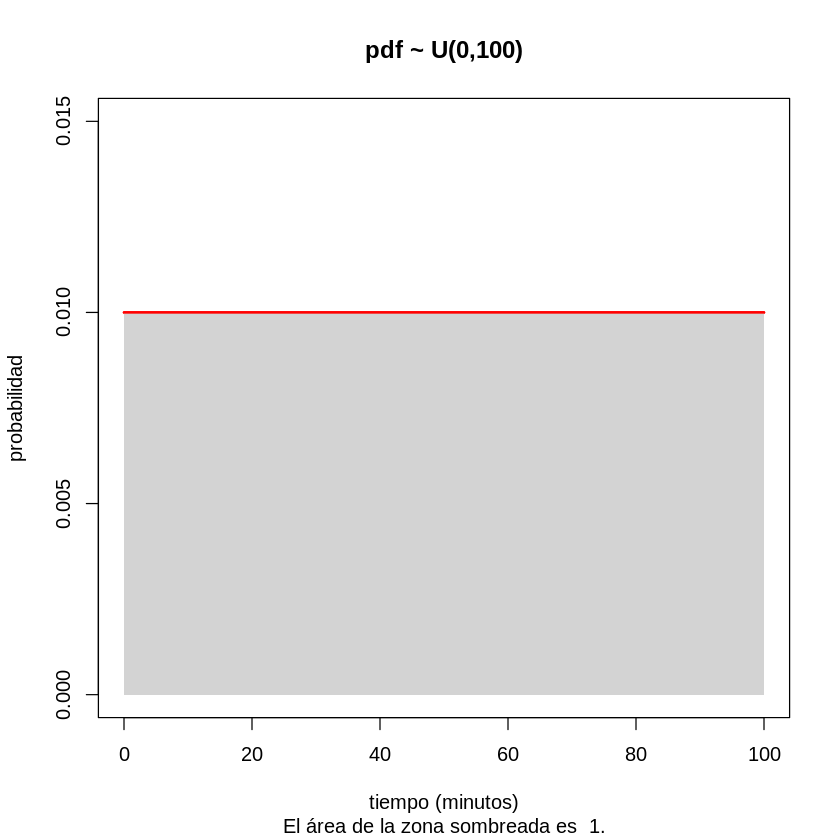

In [20]:
#::GMG::La dbujo
# http://msenux2.redwoods.edu/MathDept/R/ContinuousDistributions.php
a <- 0
b <- 100
x <- seq(a, b, length = 2*b)
y <- dunif(x, min = a,max = b)
plot(x, y, type="l", 
     xlim = c(0,100), ylim = c(0,1.5/b),
     lwd = 2,col = 'red', 
     xlab = 'tiempo (minutos)', ylab = 'probabilidad',
     main = 'pdf ~ U(0,100)',
     sub = 'El área de la zona sombreada es  1.'
    )
polygon(c(a,x,b),
        c(0,y,0),
        col='lightgray', 
        border=NA
       )
lines(x, y, type = 'l',
      lwd = 2, col = "red")

In [1]:
#::GMG:: El tiempo de espera es una variable aleatoria uniforme continua en el intervalo [0,100]
#        X ~ U (a,b)
#        La media matemática (el tiempo medio de espera) y la varianza matemática, en minutos 
#        y minutos al cuadrado son las siguientes ...
paste('E(X) =', (b+a)/2, 'minutos')
paste('Var(X)  =', round((b-a)^2/12,3), 'minutos^2')

[1] "E(X) = 50 minutos"

[1] "Var(X)  = 833.333 minutos^2"

In [2]:
#::GMG::Lo ponedmos calcular según la definición de E(X) en pp. 20-21, apartado 3.10 de los
#       aountes
f <- function(x) {1/(b-a)}
E.x <- integrate(f = function (x) {x*f(x)},
                 lower = a, 
                 upper = b
                )
paste('E(X) =', E.x$value, 'minutos')

[1] "E(X) = 50 minutos"

In [3]:
#::GMG::Según la definición de Var(X) = E(X^2) - E(X)^2 en pp. 22-23, apartado 3.13 de los
#       apuntes
E.x.2 <- integrate(f = function (x) {x^2*f(x)},
                   lower = a, 
                   upper = b
                 )
Var.x = E.x.2$value - E.x$value^2
paste('Var(X)  =', round(Var.x,3), 'minutos^2')

[1] "Var(X)  = 833.333 minutos^2"

In [4]:
#::GMG:: Usando la función de R para la pdf de X ~ U (a,b), i.e dunif()
# https://www.rdocumentation.org/packages/stats/versions/3.5.1/topics/Uniform
E.x.alt <- integrate(f = function (x) {x*dunif(x,a,b)},
                 lower = a, 
                 upper = b
                )
paste('E(X) =', E.x.alt$value, 'minutos')

[1] "E(X) = 50 minutos"

In [5]:
E.x.2.alt <- integrate(f = function (x) {x^2*dunif(x,a,b)},
                   lower = a, 
                   upper = b
                 )
Var.x.alt = E.x.2.alt$value - E.x.alt$value^2
paste('Var(X)  =', round(Var.x.alt,3), 'minutos^2')

[1] "Var(X)  = 833.333 minutos^2"

ii) Simula los tiempos de espera de una muestra aleatoria de personas con tamaño muestral
n = 30 y calcula la media muestral, $\bar{X}$ y la varianza muestral $S^2$.

**::GMG::** Apuntes de estadística Capítulo 5, apartados 5.1 a 5.7, pp. 33-35

In [6]:
#::GMG::Para simular los tiempos de espera uso runif directamente ya que tenemos
#       todos los datos, una selección aleatoria de 30 individuos de la población y la función
#       que genera los valores de la muestra en R que es runif()
# ::nota::Fijamos un seed para poder repetir el experimento
set.seed(1)
X.30 <- runif(n = 30,min = a, max = b)

In [7]:
#::GMG::La media muestral y la varianza muestral se pueden calcular con R mean() y var()
#       ambos son estadísticos calculados a partir de los valores (realización de la muestra) 
#       de la simulación
paste('Media muestral (n = 30):', round(mean(X.30),3), 'minutos')
paste('Varianza muestral (n = 30):', round(var(X.30),3), 'minutos^2')

[1] "Media muestral (n = 30): 50.955 minutos"

[1] "Varianza muestral (n = 30): 871.903 minutos^2"

iii) ¿Cuanto valen E($\bar{X}$) y Var($\bar{X}$) para n = 30? Y si aumentaramos a n = 100?

**::GMG** Apuntes de estadística *5.3. Media muestral* y *5.4 Teorema central del límite* pp. 34

In [8]:
#::GMG::EL estadístico media muestral es una variable aleatoria con su E() y Var()
#       El segundo valor matemático depende del tamaño de la muestra
#       E(mean(X)) = E(X) y Var(mean(X)) = Var(X)/n
#       Para el caso de una muestra de tamaño 30
paste('Esperanza Matemática (n = 30):', E.x$value)
paste('Varianza Matemática (n = 30):',round(Var.x/30,3))

[1] "Esperanza Matemática (n = 30): 50"

[1] "Varianza Matemática (n = 30): 27.778"

In [9]:
#::GMG::Para el caso de una muestra de tamaño 100 vemos que se reduce proporcionalmente
#       la varianza matemática del estadístico
set.seed(1)
X.100 <- runif(n = 100,min = a, max = b)
paste('Media muestral (n = 100):', round(mean(X.100),3), 'minutos')
paste('Varianza muestral (n = 100):', round(var(X.100),3), 'minutos^2')
paste('Esperanza Matemática (n = 100):', E.x$value)
paste('Varianza Matemática (n = 100):',round(Var.x/100,3))

[1] "Media muestral (n = 100): 51.785 minutos"

[1] "Varianza muestral (n = 100): 716.016 minutos^2"

[1] "Esperanza Matemática (n = 100): 50"

[1] "Varianza Matemática (n = 100): 8.333"

iv) Simula 500 muestras aleatorias de tamaño = 30 de la variable X. Recomendación: Introduce las muestras en una matriz de 30 filas y 500 columnas.

In [10]:
#::GMG::Ahora tenemos 500 realizaciones de una muestra aleatoria de tamaño 30
set.seed(1)
tamaño <- 30
muestras <- 500
M.x.30 <- matrix(data = runif(n = tamaño*muestras, min = a, max = b), 
                 nrow = tamaño, ncol = muestras, byrow = TRUE)
dim(M.x.30)

[1]  30 500

v) Calcula las 500 medias muestrales, es decir $\bar{X}_1$, $\bar{X}_2$, ... $\bar{X}_{500}$. Recomendación: Utiliza el comando `colMeans`.

In [11]:
#::GMG::Calculamos el estadístico media muestral de cada una de las realizaciones
#       con lo que tendremos 500 valores del estadístico de la media del tiempo de espera
media.M.x.30 <- colMeans(M.x.30)
str(media.M.x.30)

 num [1:500] 48.4 54.9 48.3 50.3 50.3 ...


In [12]:
#::GMG::También se puede practicar con apply() y mean() :)
media.M.x.30.alt <- apply(X = M.x.30, MARGIN = 2,FUN = mean)
str(media.M.x.30.alt)

 num [1:500] 48.4 54.9 48.3 50.3 50.3 ...


vi) Calcula la media y varianza de las 500 medias muestrales y comparalas con los valores
obtenidos en el tercer apartado.

In [23]:
#::GMG::Ahora tenemos una muestra de tamaño 500 de una variable aleatoria "tiempo medio de espera"
#       que es un estadístico de centralidad del tiempo de espera en minutos. 
#::GMG::Podemos interpretar que tomando ese número elevado de muestras vamos a reducir la varianza
#       del estadístico y su valor medio va a converger al valor de E(X)
media.30 <- mean(media.M.x.30) 
varianza.30 <- var(media.M.x.30)
paste('Media  X_bar (500,30):', round(media.30,3), 'minutos')
paste('Varianza  X_bar (500,30):', round(varianza.30,3), 'minutos^2')

[1] "Media  X_bar (500,30): 49.98 minutos"

[1] "Varianza  X_bar (500,30): 27.789 minutos^2"

vii) Repite los tres pasos anteriores para 500 muestras aleatorias de tamaño n = 100.

In [28]:
set.seed(1)
tamaño <- 100
M.x.100 <- matrix(data = runif(n = tamaño*muestras, min = a, max = b), 
                 nrow = tamaño, ncol = muestras, byrow = TRUE)
dim(M.x.100)

[1] 100 500

In [29]:
media.M.x.100 <- colMeans(M.x.100)
str(media.M.x.100)

 num [1:500] 50.4 51 47 52.5 47.1 ...


In [30]:
media.100 <- mean(media.M.x.100) 
varianza.100 <- var(media.M.x.100)
paste('Media  X_bar (500,100):', round(media.100,3), 'minutos')
paste('Varianza  X_bar (500,100):', round(varianza.100,3), 'minutos^2')

[1] "Media  X_bar (500,100): 50.028 minutos"

[1] "Varianza  X_bar (500,100): 8.811 minutos^2"

viii) Representa las 500 medias de tamaño n = 30 y las 500 medias de tamaño n = 100 mediante
dos histogramas en una gráfica de dos paneles.

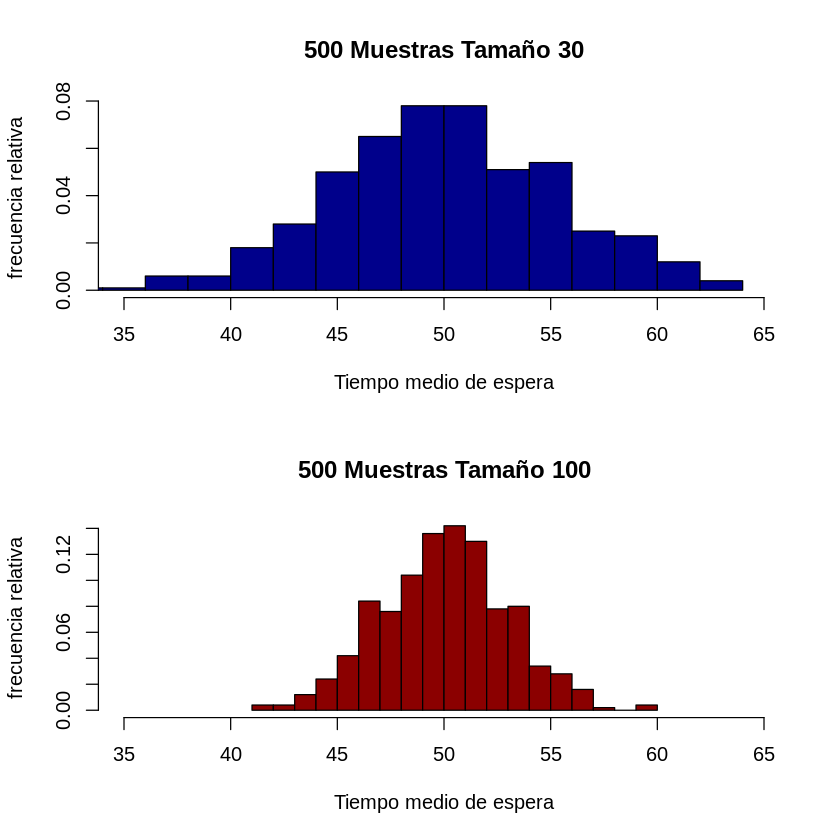

In [37]:
par(mfrow=c(2,1)) 
hist(media.M.x.30, freq=FALSE,
     xlab='Tiempo medio de espera', ylab = 'frecuencia relativa',
     xlim = c(35,65),
     col = 'darkblue', breaks='FD',
     main = '500 Muestras Tamaño 30')
hist(media.M.x.100, freq=FALSE,
     xlab='Tiempo medio de espera', ylab = 'frecuencia relativa',
     xlim = c(35,65),
     col = 'darkred', breaks='FD',
     main = "500 Muestras Tamaño 100")

ix) Superpón a cada histograma la función densidad normal con μ = E(X) y $σ^2$ = Var(X)/n.

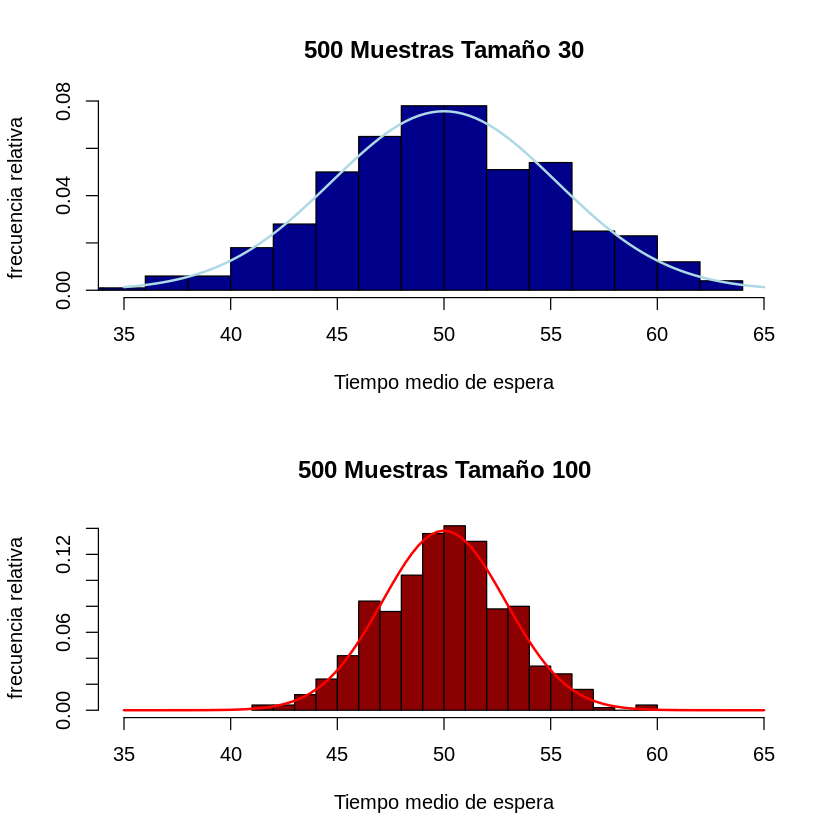

In [40]:
# https://stackoverflow.com/questions/9046664/how-to-use-the-function-curve-in-r-to-graph-a-normal-curve
par(mfrow=c(2,1)) 
tamaño <- 30
hist(media.M.x.30, freq=FALSE,
     xlab='Tiempo medio de espera', ylab = 'frecuencia relativa',
     xlim = c(35,65),
     col = 'darkblue', breaks='FD',
     main = '500 Muestras Tamaño 30')
curve(dnorm(x, (b+a)/2, sqrt((b-a)^2/(tamaño*12))), 
      col = "lightblue", lwd = 2, add = TRUE)

tamaño <- 100
hist(media.M.x.100, freq=FALSE,
     xlab='Tiempo medio de espera', ylab = 'frecuencia relativa',
     xlim = c(35,65),
     col = 'darkred', breaks='FD',
     main = "500 Muestras Tamaño 100")
curve(dnorm(x, (b+a)/2, sqrt((b-a)^2/(tamaño*12))), 
      col = "red", lwd = 2, add = TRUE)

x) Comenta el resultado.

**::GMG::** Como es de esperar el estadístico/estimador media muestral mejora con el tamaño de la muestra el valor puntual del tiempo medio de espera (parámetro) que proporciona (ley de los grandes números, 5.3 Media muestral pp. 34, apuntes de estadística) y reduce de forma inversamente proporcional al número de muestras su varianza (desviación típica) entorno al valor que proporciona. Es por lo tanto un estimador insesgado y consistente.

**::GMG::** La media muestral sigue una *distribución normal* aún cuando la distribución inicial es *uniforme*, tal y como esperamos de acuerdo con el *teorema central del límite*.